In [130]:
import simpy
import random
from matplotlib import cm
from matplotlib import colors
import matplotlib.pyplot as plt

In [60]:
%matplotlib inline

MAX_VEHICULOS = 57
TIEMPO_LAVADO = 7
INTERVALO_LLEGADA = 2
TIEMPO_SIMULACION = 60
tiempo_3_maquinas = {}
tiempo_4_maquinas = {}

In [24]:
class Lavanderia(object):
    
    def __init__(self, enviroment, num_maquinas, tiempo_lavado):
        
        self.env = enviroment
        
        self.maquinas = simpy.Resource(enviroment, num_maquinas)
        
        self.tiempo_lavado = tiempo_lavado
        
    def lavar_vehiculo(self, vehiculo, tipo):
        
        if tipo == 1:
            
            yield self.env.timeout(random.randint(15, 20))
            
        elif tipo == 2:
            
            yield self.env.timeout(random.randint(7, 10))
            
        elif tipo == 3:
            
            yield self.env.timeout(random.randint(12, 15))

In [65]:
def llegada_vehiculo(env, nombre, lavanderia, tipo, maq):
    
    print("Llegada " + nombre + ": a la hora %.2f. " % (env.now))
    
    with lavanderia.maquinas.request() as maquina:
        
        yield maquina
        
        print(nombre + " en traslado a la hora %.2f. " % (env.now))
        
        yield env.process(traslado(env, tipo))
        
        print("Entra " + nombre + " a lavarse: a la hora %.2f. " % (env.now))
        
        yield env.process(lavanderia.lavar_vehiculo(nombre, tipo))
        
        print(nombre + " [%s] lavado completo a las %.2f. " % (nombre, env.now))
        
        # SE OBTIENE EL TIEMPO ACTUAL DE LA SIMULACIÓN PARA GENERAR LA CLAVE DEL DICCIONARIO
        k = env.now
    
    if maq == 3:
        if k in tiempo_3_maquinas:
            tiempo_3_maquinas[k] = tiempo_3_maquinas[k] + 1
        else:
            tiempo_3_maquinas[k] = 1
    elif maq == 4:
        if k in tiempo_4_maquinas:
            tiempo_4_maquinas[k] = tiempo_4_maquinas[k] + 1
        else:
            tiempo_4_maquinas[k] = 1

In [26]:
def traslado(env, tipo):
    if tipo == 1:        
        yield env.timeout(4)
    elif tipo == 2:
        yield env.timeout(1)
    elif tipo == 3:
        yield env.timeout(2)

In [27]:
def ejecutar_simulacion(env, num_maquinas, tiempo_lavado, intervalo):

    tipoNombre = ""
    
    lavanderia = Lavanderia(env, num_maquinas, tiempo_lavado)
    
    for i in range(5):
        
        tipo = random.sample(range(1,4), 1)
    
        if tipo[0] == 1:
            tipoNombre = "Bus"
        elif tipo[0] == 2:
            tipoNombre = "Automóvil"
        elif tipo[0] == 3:
            tipoNombre = "Furgoneta"
        
        env.process(llegada_vehiculo(env, tipoNombre + "-%d"%(i+1), lavanderia, tipo[0], num_maquinas))
        
    while True:
        
        yield env.timeout(random.randint(1,2))
        
        i += 1
        
        env.process(llegada_vehiculo(env, tipoNombre + "-%d"%(i+1), lavanderia, tipo[0], num_maquinas))

In [77]:
print("LAVANDERIA UPS 3 MAQUINAS")

tiempo_3_maquinas = {}

NUM_MAQUINAS = 3

# random.seed(77)

env = simpy.Environment()

env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_LAVADO, INTERVALO_LLEGADA))

env.run(until = TIEMPO_SIMULACION)

print(tiempo_3_maquinas)

etiqueta_3_maquinas = list(tiempo_3_maquinas.keys())

valores_3_maquinas = list(tiempo_3_maquinas.values())

LAVANDERIA UPS 3 MAQUINAS
Llegada Bus-1: a la hora 0.00. 
Llegada Automóvil-2: a la hora 0.00. 
Llegada Automóvil-3: a la hora 0.00. 
Llegada Automóvil-4: a la hora 0.00. 
Llegada Bus-5: a la hora 0.00. 
Bus-1 en traslado a la hora 0.00. 
Automóvil-2 en traslado a la hora 0.00. 
Automóvil-3 en traslado a la hora 0.00. 
Entra Automóvil-2 a lavarse: a la hora 1.00. 
Entra Automóvil-3 a lavarse: a la hora 1.00. 
Llegada Bus-6: a la hora 2.00. 
Llegada Bus-7: a la hora 3.00. 
Llegada Bus-8: a la hora 4.00. 
Entra Bus-1 a lavarse: a la hora 4.00. 
Llegada Bus-9: a la hora 6.00. 
Llegada Bus-10: a la hora 7.00. 
Llegada Bus-11: a la hora 8.00. 
Llegada Bus-12: a la hora 9.00. 
Automóvil-2 [Automóvil-2] lavado completo a las 10.00. 
Automóvil-3 [Automóvil-3] lavado completo a las 10.00. 
Automóvil-4 en traslado a la hora 10.00. 
Bus-5 en traslado a la hora 10.00. 
Llegada Bus-13: a la hora 11.00. 
Entra Automóvil-4 a lavarse: a la hora 11.00. 
Llegada Bus-14: a la hora 13.00. 
Entra Bus-5 a l

In [78]:
print("LAVANDERIA UPS 4 MAQUINAS")

tiempo_4_maquinas = {}

NUM_MAQUINAS = 4

# random.seed(77)

env = simpy.Environment()

env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_LAVADO, INTERVALO_LLEGADA))

env.run(until = TIEMPO_SIMULACION)

print(tiempo_4_maquinas)

etiqueta_4_maquinas = list(tiempo_4_maquinas.keys())

valores_4_maquinas = list(tiempo_4_maquinas.values())

LAVANDERIA UPS 4 MAQUINAS
Llegada Bus-1: a la hora 0.00. 
Llegada Bus-2: a la hora 0.00. 
Llegada Bus-3: a la hora 0.00. 
Llegada Bus-4: a la hora 0.00. 
Llegada Furgoneta-5: a la hora 0.00. 
Bus-1 en traslado a la hora 0.00. 
Bus-2 en traslado a la hora 0.00. 
Bus-3 en traslado a la hora 0.00. 
Bus-4 en traslado a la hora 0.00. 
Llegada Furgoneta-6: a la hora 1.00. 
Llegada Furgoneta-7: a la hora 3.00. 
Entra Bus-1 a lavarse: a la hora 4.00. 
Entra Bus-2 a lavarse: a la hora 4.00. 
Entra Bus-3 a lavarse: a la hora 4.00. 
Entra Bus-4 a lavarse: a la hora 4.00. 
Llegada Furgoneta-8: a la hora 5.00. 
Llegada Furgoneta-9: a la hora 7.00. 
Llegada Furgoneta-10: a la hora 8.00. 
Llegada Furgoneta-11: a la hora 9.00. 
Llegada Furgoneta-12: a la hora 11.00. 
Llegada Furgoneta-13: a la hora 13.00. 
Llegada Furgoneta-14: a la hora 14.00. 
Llegada Furgoneta-15: a la hora 15.00. 
Llegada Furgoneta-16: a la hora 16.00. 
Llegada Furgoneta-17: a la hora 17.00. 
Llegada Furgoneta-18: a la hora 18.00.

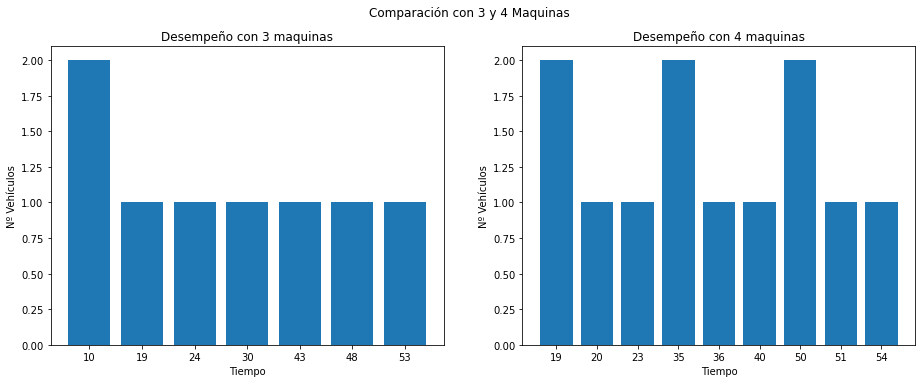

In [80]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15.5, 5.5)
fig.suptitle("Comparación con 3 y 4 Maquinas")
ax1.bar(range(len(tiempo_3_maquinas)), valores_3_maquinas, align="center", tick_label=etiqueta_3_maquinas)
ax1.set_title("Desempeño con 3 maquinas")
ax1.set_ylabel("Nº Vehículos")
ax1.set_xlabel("Tiempo")
ax2.bar(range(len(tiempo_4_maquinas)), valores_4_maquinas, align="center", tick_label=etiqueta_4_maquinas)
ax2.set_title("Desempeño con 4 maquinas")
ax2.set_ylabel("Nº Vehículos")
ax2.set_xlabel("Tiempo")
plt.show()

In [115]:
# CALCULANDO EL TOTAL DE AUTOS LAVADOS SEGÚN EL NÚMERO DE MAQUINAS

total_3_maquinas = 0
for i in tiempo_3_maquinas:
    total_3_maquinas += tiempo_3_maquinas.get(i)
print("Total de autos lavados con 3 maquinas: " + str(total_3_maquinas))

total_4_maquinas = 0
for i in tiempo_4_maquinas:
    total_4_maquinas += tiempo_4_maquinas.get(i)
print("Total de autos lavados con 4 maquinas: " + str(total_4_maquinas))

Total de autos lavados con 3 maquinas: 8
Total de autos lavados con 4 maquinas: 12


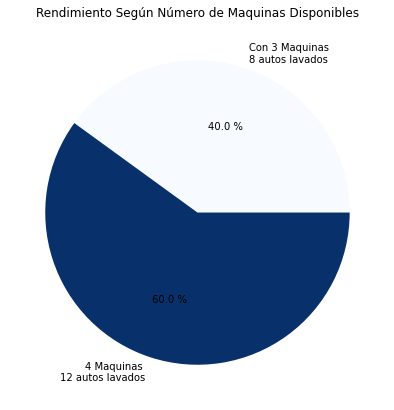

In [139]:
label = ["Con 3 Maquinas \n" + str(total_3_maquinas) + " autos lavados", 
         "4 Maquinas \n" + str(total_4_maquinas) + " autos lavados"]
total = [total_3_maquinas, total_4_maquinas]

normdata = colors.Normalize(min(total), max(total))
colormap = cm.get_cmap("Blues")
colores = colormap(normdata(total))

fig = plt.figure(figsize =(10, 7))
plt.pie(total, labels = label, colors = colores, autopct="%0.1f %%")
plt.title("Rendimiento Según Número de Maquinas Disponibles")
plt.show()